# 1) Setup

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats
from copy import copy
import time

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [4]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data1 import *
from filter_data2 import *
from filter_data3 import *
from select_data import *
from select_data_edge import *


print("done")

done


# 2) Remove edge transitions with >1 robot on an edge

In [5]:
#1) Import data from PyMongo
df = get_data(address = "walmart_random")
#2) Preliminary filtering
df = filter_data1(df)
print("done")

done


In [6]:
#3a) Count n_robots
tic = time.time()
df = filter_data2(df)
toc = time.time()
print("done", toc-tic)

done 121.78302955627441


In [7]:
#3b) save to excel
df.to_excel("n_robots_random.xlsx")
print("done")

done


In [8]:
#3c) load from excel
df = pd.read_excel("n_robots_random.xlsx")
print("done")

done


In [9]:
#4) Get rid of is_final = True & n_robots != 1
#create is_initial column and get rid of is_initial == True
df = filter_data3(df)
df.head()

,origin,target,edge_id,operation_time,start,finish,n_robots,is_final,is_initial
0,WayPoint110,WayPoint68,WayPoint110_WayPoint68,4.898,2021-02-23 21:18:37.108,2021-02-23 21:18:42.376,1,False,False
1,WayPoint68,WayPoint61,WayPoint68_WayPoint61,10.916,2021-02-23 21:19:12.520,2021-02-23 21:19:17.788,1,False,False
2,WayPoint61,WayPoint54,WayPoint61_WayPoint54,9.276,2021-02-23 21:19:42.080,2021-02-23 21:19:47.348,1,False,False
3,WayPoint54,WayPoint47,WayPoint54_WayPoint47,10.398,2021-02-23 21:20:15.528,2021-02-23 21:20:20.796,1,False,False
4,WayPoint47,WayPoint48,WayPoint47_WayPoint48,10.212,2021-02-23 21:20:48.740,2021-02-23 21:20:54.008,1,False,False


In [10]:
#5a) save to excel
df.to_excel("filtered_data_random.xlsx")
print("done")

done


In [11]:
#5b) load from excel
df = pd.read_excel("filtered_data_random.xlsx")
print("done")

done


# 3) Count

In [12]:
count = df["edge_id"].value_counts()
count

WayPoint68_WayPoint61    366
WayPoint61_WayPoint54    349
WayPoint75_WayPoint68    320
WayPoint54_WayPoint47    303
WayPoint47_WayPoint40    268
                        ... 
WayPoint45_WayPoint44      7
WayPoint37_WayPoint36      7
WayPoint9_WayPoint10       7
WayPoint10_WayPoint9       6
WayPoint17_WayPoint16      5
Name: edge_id, Length: 251, dtype: int64

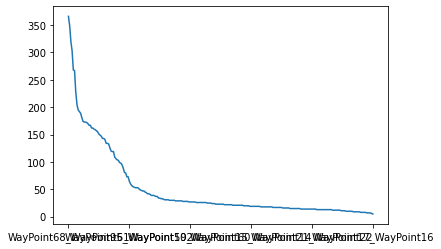

In [13]:
count.plot()